In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the uploaded CSV file
file_path = "/Housing.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Binary categorical columns with 'yes'/'no'
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Display the first few rows of the updated dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1754318687330.668, 0.6529242642153176)

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mae, adjusted_r2

(970043.4039201642, 0.6054296898447821)

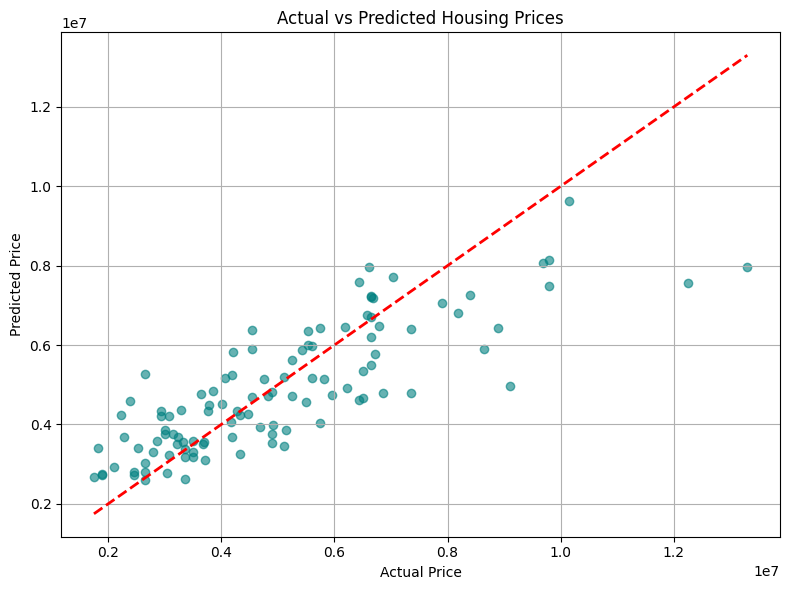

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

This means that when all features are zero (after standardization), the predicted house price would be approximately ₹47.1 lakhs.

In [ ]:
# Retrieve the model intercept
intercept = model.intercept_
intercept

np.float64(4706527.385321101)

Bathrooms and Area are the most influential features.

Air conditioning and extra stories also significantly increase price.

Being unfurnished decreases price.

Bedrooms contribute the least after scaling.

In [ ]:
# Retrieve feature names after standardization
feature_names = X.columns

# Get model coefficients
coefficients = model.coef_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance

,Feature,Coefficient
2,bathrooms,521879.027748
0,area,519552.416340
8,airconditioning,365157.393851
3,stories,349251.438906
10,prefarea,266656.351993
12,furnishingstatus_unfurnished,-192015.917982
9,parking,192005.953667
6,basement,187067.803214
7,hotwaterheating,149862.702991
4,mainroad,128498.628215


Here's the bar chart showing the importance of each feature based on the linear regression coefficients:

Positive bars indicate features that increase the predicted price.

Negative bars indicate features that decrease it.

Features are sorted by absolute importance, so the most impactful ones appear at the top.

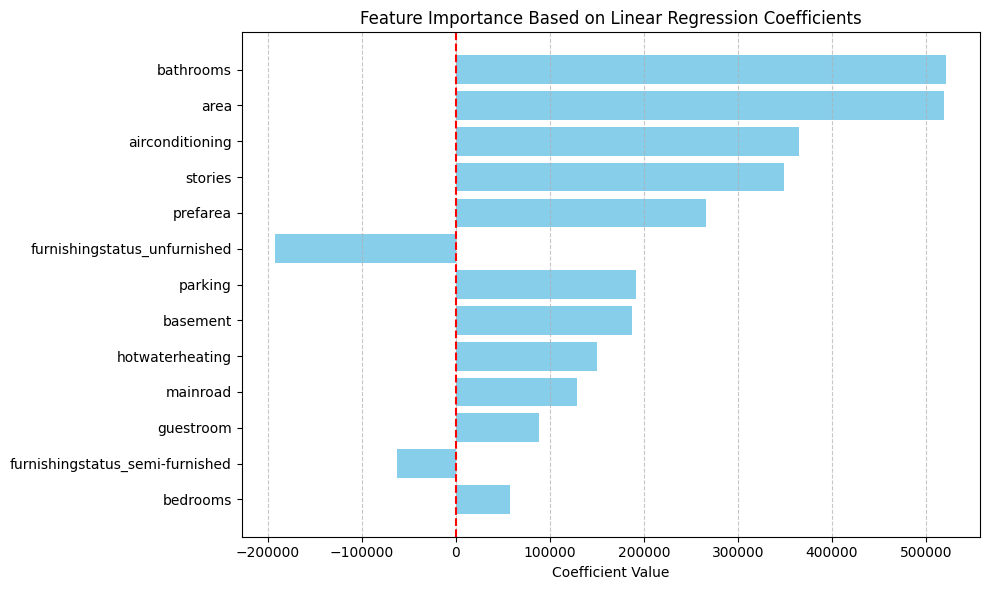

In [ ]:
# Plotting feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importance Based on Linear Regression Coefficients")
plt.axvline(0, color='red', linestyle='--')
plt.gca().invert_yaxis()  # Most important at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()